# Ozone Comparison

In [1]:
require "distribution"
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

## Variables

In [2]:
prefixes = ["20160219", "20160220", "20160221"]
description = ["(filtered, ascending)", "(unfiltered, ascending)", "(filtered, descending)"]

dir = "../DOAS/"

filetype = ".csv"
postfix = "_O3_fluxes"
nil

In [4]:
inputs = prefixes.map do |p|
  dir+p+postfix+filetype
end
nil

## Data Preparation

In [9]:
dfs = inputs.map do |input|
  d = DataFrame.from_csv(input)
  d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})
  d
end
nil

## Plots

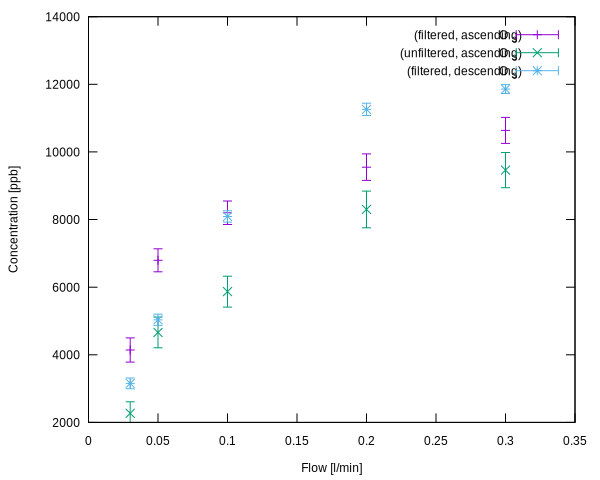

In [10]:
plot_o3 = Plot.new(
  *dfs.each_with_index.map do |d,i|
    [d[:flux, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3 " + description[i]]
  end,
  xlabel: "Flow [l/min]",
  ylabel: "Concentration [ppb]",
  xrange: 0..0.35,
  yrange: 2000..14000
  )

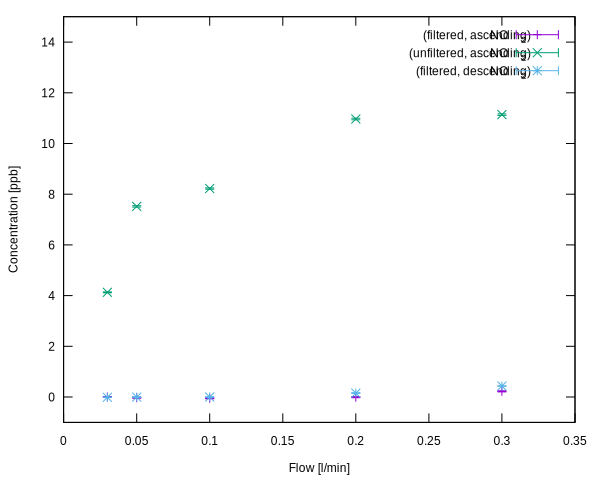

In [11]:
plot_no2 = Plot.new(
  *dfs.each_with_index.map do |d,i|
    [d[:flux, :no2, :no2_err], using: "2:3:4", with: "yerrorbars", title: "NO_2 " + description[i]]
  end,
  xlabel: "Flow [l/min]",
  ylabel: "Concentration [ppb]",
  xrange: 0..0.35,
  yrange: -1..15
  )